In [1]:
# TODO get a lens from the sample then save it locally

# TODO have a version of the lens with and without substructure i.e. need clean model

In [2]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [3]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from glob import glob
from hydra import initialize, compose

from mejiro.helpers import test_physical_lens, sample_skypy_lens
from mejiro.pandeia import pandeia_input
from mejiro.pandeia.pandeia_output import PandeiaOutput
from mejiro.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/mejiro/mplstyle/science.mplstyle')

In [4]:
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
array_dir = os.path.join(array_dir, 'multiprocessing')
figure_dir = os.path.join(repo_dir, 'figures')

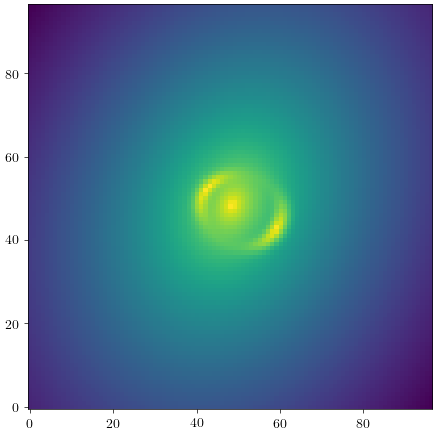

In [7]:
lens = sample_skypy_lens.SampleSkyPyLens()

model = lens.get_array(num_pix=97, side=10.67)
plt.imshow(np.log10(model))

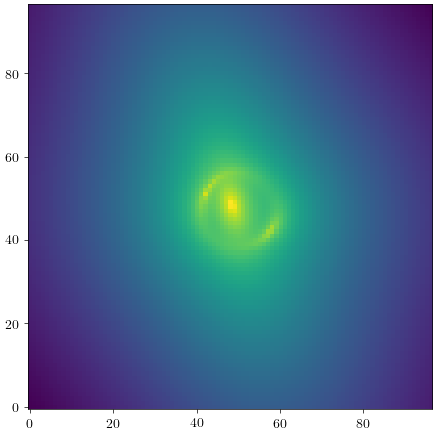

In [6]:
image = np.load('/data/bwedig/mejiro/output/arrays/skypy_output/skypy_output_00000038.npy')
plt.imshow(np.log10(image))